In [27]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [28]:
# 导入训练集，测试集
train = pd.read_csv(r'C:\Users\lenovo\Desktop\机器学习课设\resource\train.csv')
test = pd.read_csv(r'C:\Users\lenovo\Desktop\机器学习课设\resource\test.csv')

In [29]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [30]:
#数据预处理，看看给的数据有没有缺失值，不过看结果好像是不存在缺失值的
train.isnull().any().describe()
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [31]:
#train有标签列和特征列两个类型的类，然后就需要分离。
X = train.iloc[:,1:]
y = train.iloc[:,0]

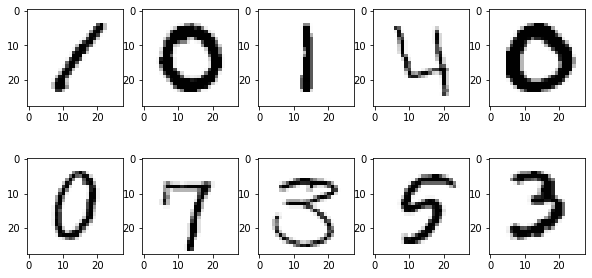

In [32]:
#将每个向量重组还原成矩阵,显示还原后的前十个数据
plt.figure(figsize = (10,5))
for num in range(0,10):
    plt.subplot(2,5,num+1)
    gridData = X.iloc[num].values.reshape(28,28)
    plt.imshow(gridData, interpolation = "none", cmap = "Greys")

In [33]:
#数据预处理，分离训练集
#将x,y放缩到（0，1）之间
#分割训练集 测试集
X = MinMaxScaler().fit_transform(X)
test = MinMaxScaler().fit_transform(test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 14)

In [34]:
#预处理之后，为了避免维度灾难，我决定对这个784的数据进行降维处理
# 生成n_components的取值列表
all_scores = []
n_components = np.linspace(0.7,0.9,num=20, endpoint=False)
#当主成分为n时,计算模型预测的准确率
def get_accuracy_score(n, x_train, x_test, y_train, y_test):
    t0 = time()
    pca = PCA(n_components = n)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    # 使用支持向量机分类器
    clf = svm.SVC()
    clf.fit(x_train_pca, y_train)
    # 计算准确度
    accuracy = clf.score(x_test_pca, y_test)
    t1 = time()
    print('n_components:{:.2f} , accuracy:{:.4f} , time elaps:{:.2f}s'.format(n, accuracy, t1-t0))
    return accuracy
#将得到的准确度加入all_scores列表中
for n in n_components:
    score = get_accuracy_score(n,x_train, x_test, y_train, y_test)
    all_scores.append(score)

n_components:0.70 , accuracy:0.9729 , time elaps:15.07s
n_components:0.71 , accuracy:0.9740 , time elaps:14.20s
n_components:0.72 , accuracy:0.9748 , time elaps:13.19s
n_components:0.73 , accuracy:0.9745 , time elaps:14.51s
n_components:0.74 , accuracy:0.9762 , time elaps:14.24s
n_components:0.75 , accuracy:0.9762 , time elaps:14.28s
n_components:0.76 , accuracy:0.9767 , time elaps:14.42s
n_components:0.77 , accuracy:0.9764 , time elaps:15.76s
n_components:0.78 , accuracy:0.9781 , time elaps:18.01s
n_components:0.79 , accuracy:0.9776 , time elaps:18.09s
n_components:0.80 , accuracy:0.9779 , time elaps:18.19s
n_components:0.81 , accuracy:0.9776 , time elaps:19.48s
n_components:0.82 , accuracy:0.9779 , time elaps:21.05s
n_components:0.83 , accuracy:0.9779 , time elaps:19.61s
n_components:0.84 , accuracy:0.9788 , time elaps:21.45s
n_components:0.85 , accuracy:0.9786 , time elaps:22.61s
n_components:0.86 , accuracy:0.9788 , time elaps:24.11s
n_components:0.87 , accuracy:0.9783 , time elaps

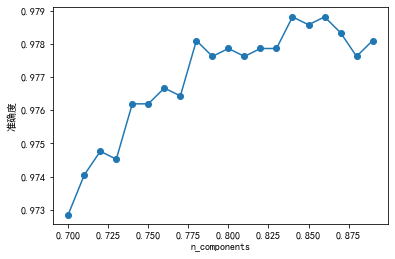

In [48]:
#画个图看看大概准确值最大大概落在哪里
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False
plt.plot(n_components, all_scores, '-o')
plt.xlabel('n_components')
plt.ylabel('准确度')
plt.show()

In [36]:
#确认n_component在0.84处准确率最大，所以调整数据
pca = PCA(n_components=0.84)
pca.fit(X)
X = pca.transform(X)
test = pca.transform(test)


In [37]:
#开始训练，使用支持向量机预测，使用网格搜索调整参数
clf_svc = GridSearchCV(estimator=svm.SVC(), param_grid={ 'C': [1, 2, 4, 5], 'kernel': [ 'linear', 'rbf', 'sigmoid' ] }, cv=5, verbose=2 )
clf_svc.fit(X, y)
predict = clf_svc.predict(test)
image_id = pd.Series(range(1,len(predict)+1))
result_2 = pd.DataFrame({'ImageID': image_id,'Label':predict})
# 保存为CSV文件
result_2.to_csv('result_svc.csv',index = False)
print('Done')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  16.4s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  16.3s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  15.8s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  16.6s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  16.4s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  17.6s
[CV] C=1, kernel=rbf .................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 20.2min finished
